In [ ]:
#!pip install tensorflow-gpu

## GPU attributes 

In [ ]:
!nvidia-smi 

Tue Oct 26 09:09:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Libraries

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# Mounting from drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image Resize

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Train'
valid_path = '/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Valid'

# Use of Pretrained ImageNet Neural Network

In [ ]:
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/*')

In [ ]:
folders

['/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Train',
 '/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Valid']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
  )

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)#False as heart position in CXR will flip

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Train',
                                                 target_size = (224, 224),
                                                batch_size = 10,
                                                class_mode = 'categorical')

Found 1124 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'Normal': 0, 'TB': 1}

In [ ]:
#First[0] batch in training set i.e 10 images with their labels 
#training_set[0]

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Valid',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 290 images belonging to 2 classes.


In [ ]:
test_set.class_indices

{'Normal': 0, 'TB': 1}

In [ ]:
#test_set.filepaths[289]

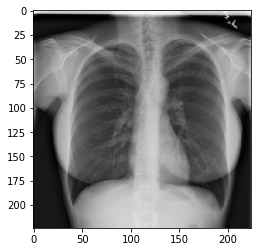

In [ ]:
path="/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Train/Normal/Normal-1000.png"
img = image.load_img(path,target_size=(224, 224))
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
#How many TB(1) in both sets
np.sum(training_set.labels) , np.sum(test_set.labels)

(560, 140)

In [ ]:
training_set.n

1124

In [ ]:
test_set.batch_size

10

In [ ]:
test_set.class_mode

'categorical'

In [ ]:
test_set.num_classes

2

# Model Execution for Training

In [ ]:
r = model.fit(training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
113/113 [==============================] - 40s 302ms/step - loss: 0.9114 - accuracy: 0.8763 - val_loss: 1.1885 - val_accuracy: 0.7517
Epoch 2/20
113/113 [==============================] - 31s 276ms/step - loss: 0.5293 - accuracy: 0.9146 - val_loss: 0.2973 - val_accuracy: 0.9552
Epoch 3/20
113/113 [==============================] - 31s 272ms/step - loss: 0.3785 - accuracy: 0.9440 - val_loss: 0.3008 - val_accuracy: 0.9655
Epoch 4/20
113/113 [==============================] - 32s 281ms/step - loss: 0.2573 - accuracy: 0.9653 - val_loss: 0.2073 - val_accuracy: 0.9759
Epoch 5/20
113/113 [==============================] - 31s 273ms/step - loss: 0.2401 - accuracy: 0.9662 - val_loss: 0.5344 - val_accuracy: 0.9517
Epoch 6/20
113/113 [==============================] - 30s 267ms/step - loss: 0.3301 - accuracy: 0.9609 - val_loss: 0.2461 - val_accuracy: 0.9793
Epoch 7/20
113/113 [==============================] - 31s 278ms/step - loss: 0.1023 - accuracy: 0.9786 - val_loss: 0.5215 - val_ac

# Plot various Curves

In [ ]:
import matplotlib.pyplot as plt

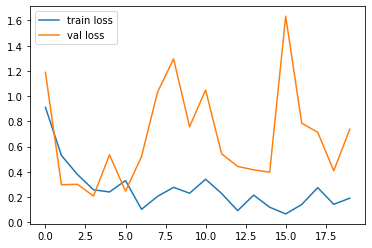

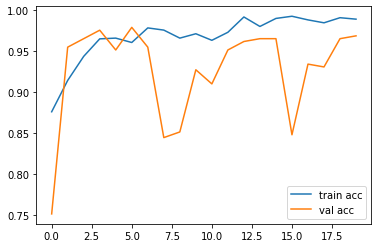

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_CXR.h5')

# Test the Model on Single TB Image

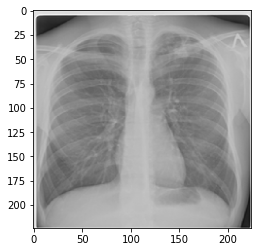

In [ ]:
path="/content/drive/MyDrive/TB_CNN - Reduced/Valid/TB/Tuberculosis-101.png"
img = image.load_img(path,target_size=(224,224))
img= image.img_to_array(img)/255
plt.imshow(img)

In [ ]:
img = np.array([img])
#img.shape
model.predict(img)

array([[4.1025452e-19, 1.0000000e+00]], dtype=float32)

In [ ]:
predictions = np.round(model.predict(img))
predictions

array([[0., 1.]], dtype=float32)

In [ ]:
#Test Report
if predictions[0][1]==0:
  print('Normal CXR: The Person does not have TB')
else :
  print('TB predicted, need to consult')

TB predicted, need to consult


#Test the Model on Single Normal Image





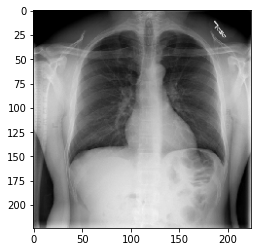

In [ ]:
path="/content/drive/MyDrive/TB_CNN - Reduced/Valid/Normal/Normal-65.png"
img = image.load_img(path,target_size=(224,224))
img= image.img_to_array(img)/255
plt.imshow(img)

In [ ]:
img = np.array([img])
#img.shape
model.predict(img)
predictions = np.round(model.predict(img))
#Test Report
if predictions[0][1]==0:
  print('Normal CXR: The Person does not have TB')
else :
  print('TB predicted, need to consult')

Normal CXR: The Person does not have TB


# Evaluate the Model

In [ ]:
model.evaluate(test_set, return_dict=True)

29/29 [==============================] - 4s 125ms/step - loss: 0.7378 - accuracy: 0.9690


{'accuracy': 0.9689655303955078, 'loss': 0.737765908241272}

# Create Confusion Matrix and Classification Report on Validation/Test Datasets

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#work with validation data named as normal data
normal_datagen = ImageDataGenerator(rescale = 1./255)                                            

In [ ]:
normal_set = normal_datagen.flow_from_directory('/content/drive/MyDrive/TB_CNN - Reduced_No Augmentation/Valid', target_size = (224, 224), shuffle=False)

Found 290 images belonging to 2 classes.


In [ ]:
normal_pred = model.predict(normal_set)

In [ ]:
normal_pred1 = np.argmax(normal_pred,axis=1)
normal_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
cm_normal = confusion_matrix(test_set.labels,normal_pred1)

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'TB')]

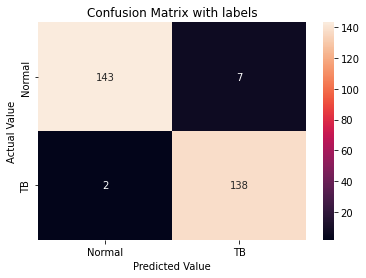

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm_normal, annot=True, fmt='d')
ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value');
ax.xaxis.set_ticklabels(['Normal', 'TB'])
ax.yaxis.set_ticklabels(['Normal', 'TB'])

In [ ]:
normal_classification_report = classification_report(test_set.labels,normal_pred1, target_names=['Normal', 'TB'])
print(normal_classification_report)

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       150
          TB       0.95      0.99      0.97       140

    accuracy                           0.97       290
   macro avg       0.97      0.97      0.97       290
weighted avg       0.97      0.97      0.97       290



## Visualize the Misclassified images

In [ ]:
normal_pred1[7]

0

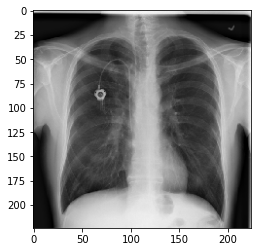

In [ ]:
path="/content/drive/MyDrive/TB_CNN - Reduced/Valid/Normal/Normal-105.png"
img = image.load_img(path,target_size=(224,224))
img= image.img_to_array(img)/255
plt.imshow(img)

In [ ]:
img = np.array([img])
#img.shape
model.predict(img)
predictions = np.round(model.predict(img))
#predictions
#Test Report
if predictions[0][1]==0:
  print('Normal CXR: The Person does not have TB')
else :
  print('TB predicted, need to consult')

TB predicted, need to consult


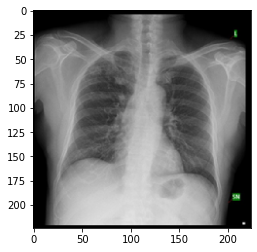

In [ ]:
path="/content/drive/MyDrive/TB_CNN - Reduced/Valid/TB/Tuberculosis-120.png"
img = image.load_img(path,target_size=(224,224))
img= image.img_to_array(img)/255
plt.imshow(img)

In [ ]:
img = np.array([img])
#img.shape
model.predict(img)
predictions = np.round(model.predict(img))
#predictions
#Test Report
if predictions[0][1]==0:
  print('Normal CXR: The Person does not have TB')
else :
  print('TB predicted, need to consult')

Normal CXR: The Person does not have TB
